# We predict  the user will click on ad banner or not

Formulation of the problem:
- 40 million records of user sessions on Mobile Web
- history of their interaction with advertising banners over 10
- for our case, we sample 5 million data from the training
samples

Task:
- We believe that the user has already seen the banner
- For a given session you need to predict whether the user will click
on a banner or not

Metrics - Negative Log Loss (NLL)

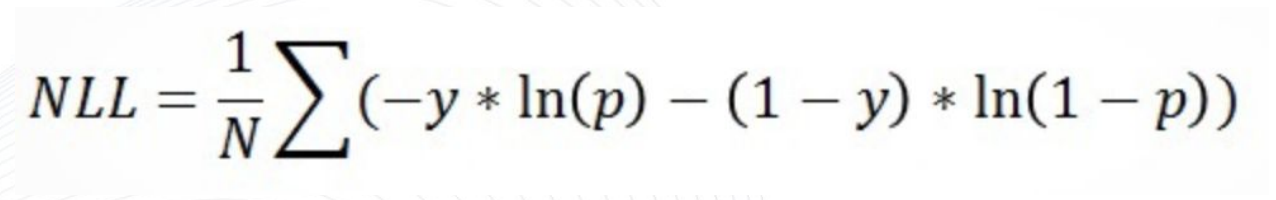

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [21]:
df = pd.read_csv('../data/raw/sampled_train_50k.csv')

In [22]:
df.shape

(50000, 25)

In [23]:
df.head()

,Unnamed: 0,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1148151,13614095229350157618,1,14102222,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,7ed30f6c,8a4875bd,1,0,20634,320,50,2374,3,39,-1,23
1,10990,5642023972583688480,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a07251cf,711ee120,1,0,15703,320,50,1722,0,35,-1,79
2,2085412,8696223902141438774,0,14102502,1002,0,6b175d24,a1b0ebd0,50e219e0,ecad2386,7801e8d9,07d7df22,630e9b36,664e14a5,766b28b3,0,0,20108,320,50,2299,2,1327,100084,52
3,3241440,16692284365181240212,0,14102717,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,a99f214a,9d834082,0bcabeaf,1,3,21189,320,50,2424,1,161,100193,71
4,3360862,10524265036687563821,0,14102801,1005,0,85f751fd,c4e18dd6,50e219e0,4b337c54,d9b5648e,0f2161f8,a99f214a,e7e6dbed,9b5ce758,1,0,21611,320,50,2480,3,297,100111,61


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50000.0,2.479551e+06,1.439601e+06,5.300000e+01,1.233248e+06,2.462724e+06,3.724000e+06,4.999892e+06
id,50000.0,9.210294e+18,5.322361e+18,1.173645e+15,4.604551e+18,9.194584e+18,1.384460e+19,1.844647e+19
click,50000.0,1.705200e-01,3.760928e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
hour,50000.0,1.410255e+07,2.959279e+02,1.410210e+07,1.410230e+07,1.410252e+07,1.410281e+07,1.410302e+07
C1,50000.0,1.004967e+03,1.094591e+00,1.001000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.012000e+03
banner_pos,50000.0,2.836400e-01,5.072213e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00
device_type,50000.0,1.016000e+00,5.296693e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
device_conn_type,50000.0,3.299200e-01,8.554808e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
C14,50000.0,1.882158e+04,4.941858e+03,3.750000e+02,1.685900e+04,2.034500e+04,2.188300e+04,2.404100e+04
C15,50000.0,3.188521e+02,2.142077e+01,1.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,1.024000e+03


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50000 non-null  int64 
 1   id                50000 non-null  uint64
 2   click             50000 non-null  int64 
 3   hour              50000 non-null  int64 
 4   C1                50000 non-null  int64 
 5   banner_pos        50000 non-null  int64 
 6   site_id           50000 non-null  object
 7   site_domain       50000 non-null  object
 8   site_category     50000 non-null  object
 9   app_id            50000 non-null  object
 10  app_domain        50000 non-null  object
 11  app_category      50000 non-null  object
 12  device_id         50000 non-null  object
 13  device_ip         50000 non-null  object
 14  device_model      50000 non-null  object
 15  device_type       50000 non-null  int64 
 16  device_conn_type  50000 non-null  int64 
 17  C14         

Features:

- click - 0/ 1 target
- hour - time and date of advertising display
- banner_pos - banner location
- site*, app* - information on the publisher's website/application where the banner is displayed
- device* - information about the user's device
- C1, C14-C21 - encrypted signs (presumably geolocation,
time zone and banner format)

Click Through Rate, CTR

In [26]:
df['click'].value_counts(normalize=True)

click
0    0.82948
1    0.17052
Name: proportion, dtype: float64

**Device_id**


- Unique device_id 600k
- 82% of all traffic comes from one device

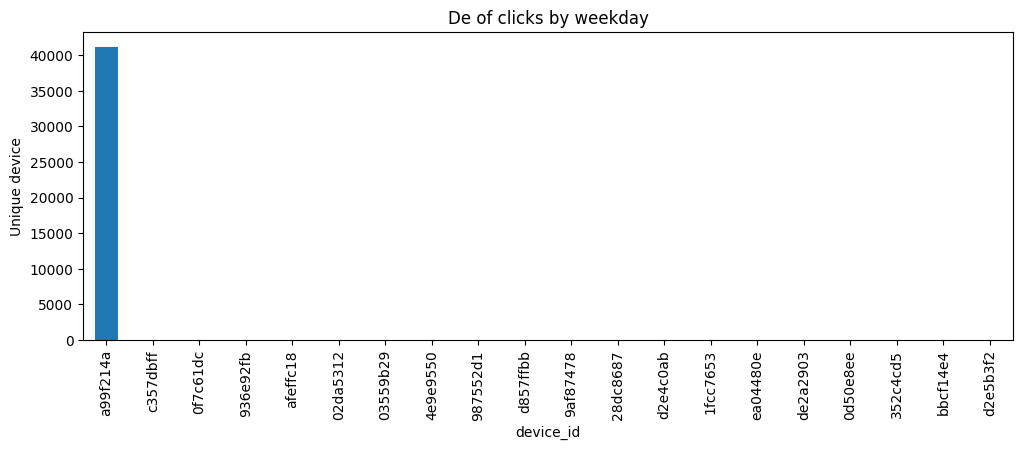

In [28]:
df['device_id'].value_counts(dropna=False).head(20).plot(kind='bar', figsize=(12,4))
plt.ylabel('Unique device')
plt.title('De of clicks by weekday')
plt.show()

**Device_ip**

- Unique device_ip 1.9M
- We can use it as a proxy user sign
- We can calculate the new attribute device_ip_counts
- Number of advertisements per user

In [29]:
df.groupby('device_ip')['click'].count().head(10)

device_ip
00002f20    1
0001e256    1
0002133a    2
00039bbc    1
000ddba9    1
00113927    1
0011b741    2
0012a85d    1
0012f7a3    1
00182a18    1
Name: click, dtype: int64

In [37]:
df.groupby('device_ip')['click'].count()

device_ip
00002f20      1
0001e256      1
0002133a      2
00039bbc      1
000ddba9      1
00113927      1
0011b741      2
0012a85d      1
0012f7a3      1
00182a18      1
001839a4      1
0018c4a3      1
001a1436      1
001c46f8      3
00232dfa      1
00249e25      1
00278bc2      1
00297904      1
002eb6fc      1
002f157a      1
002f9564      1
002ff29c      1
00303100      1
00311702      1
0031376a      1
00321b5e      1
0032a738      1
0032c849      4
00339a08      1
003421a2      1
00358072      3
0035ed78      1
0036c91b      1
00388693      1
003b1824      1
003e1e42      1
00419924      1
0042ab43      1
00436625      1
0044a945      1
00457263      1
0048bb1f      1
00491621      1
004ade55      1
004b88d9      1
004f0d79      1
004fbb8a      1
00535b46      1
00537fab      2
005648db      1
0057e08a      1
005a21b5      1
005a654f      1
005d5dac      1
005db2b8      1
005fa6d0      1
0063f6fc      1
0065231a      1
00653177      1
00657886      1
0065d2ee      1
006759d5      

In [ ]:
df['hour'] = pd.to_datetime(df['hour'], format = '%y%m%d%H')
df['hour_of_day'] = df['hour'].dt.hour
df['weekday'] = (df['hour'].dt.dayofweek)

In [ ]:
df.groupby('weekday')['click'].sum().plot.bar(figsize=(12,4))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by weekday')
plt.show()

In [ ]:
df.groupby('hour_of_day')['click'].sum().plot.bar(figsize=(12,4))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour of day')
plt.show()

# Pipeline

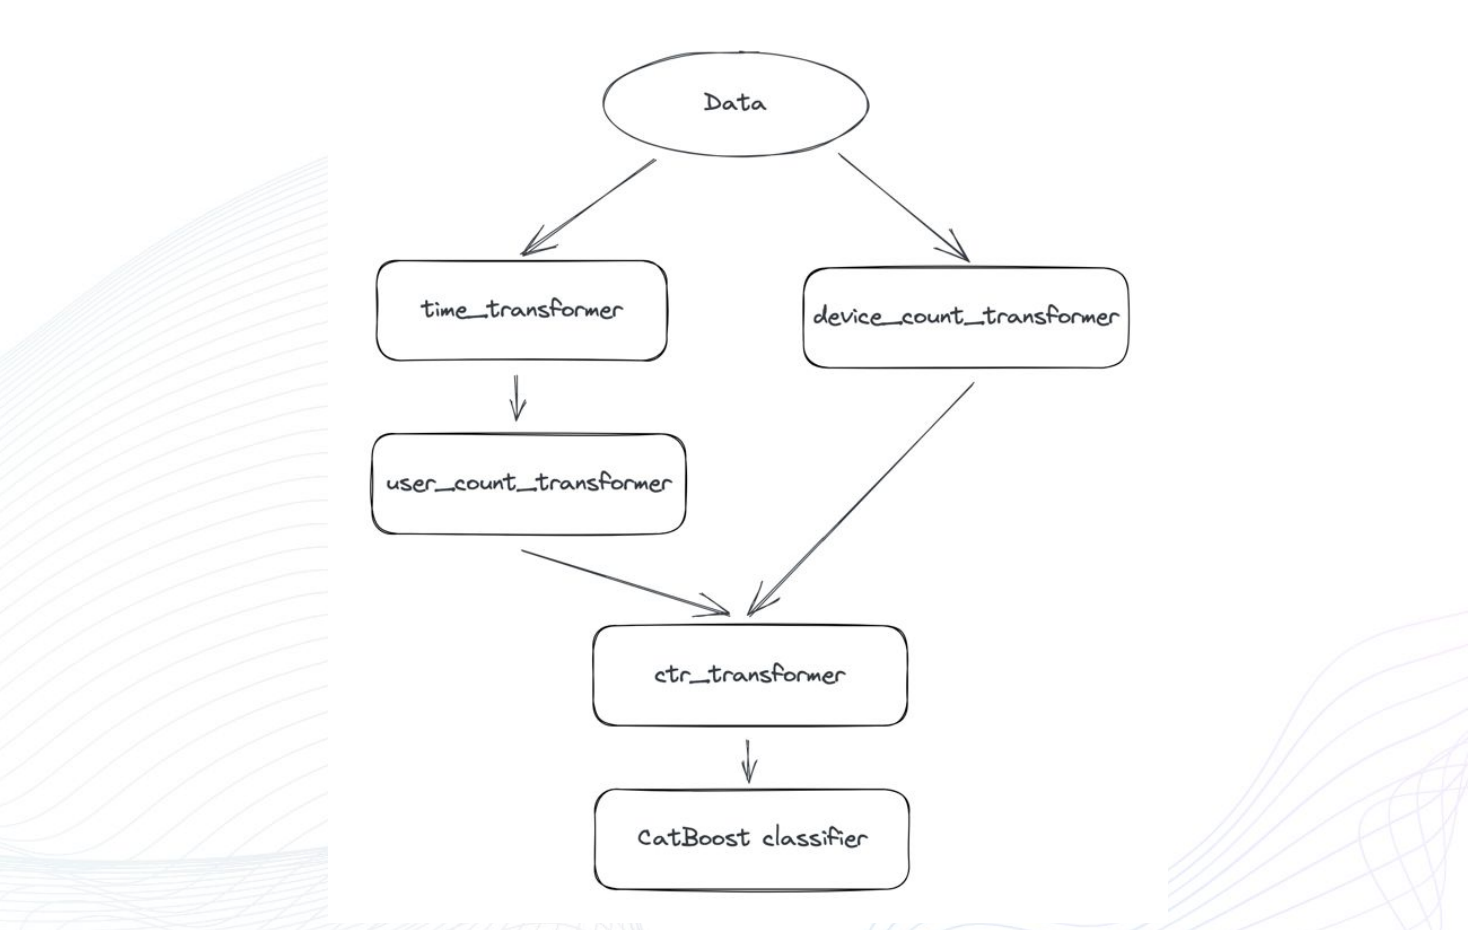